## NH3 reference cell around 2928 nm

### Workflow 

     1. initiate a 'Spectra' object
     2. add observer
     3. add gass_cells & gasses
     4. download data (runs the hapi functions)
     5. plot
    
    comment: the arguments of the gas_cell method are the default values as on spectracalc.com
             ! when using multiple gas cells, the spectra are calculated seperately and plotted on top of each other. (Not combined absorption as in spectracalc)

In [31]:
%%capture
%load_ext autoreload
%autoreload 2
from classes import Spectra, Observer, HiddenPrints

Using data

CH4
                     Lines parsed: 164
H2O
                     Lines parsed: 100
NH3
                     Lines parsed: 54


In [38]:
%%capture
#%% 1. create a spectrum
my_spectrum = Spectra(name = 'NH3_Line_2928_nm')

#%% 2. add an observer
my_spectrum.observer = Observer(unit  = 'lam',      #'wav' : wavenumer [1/cm] | 'lam' : wavelength [nm]
                                lower =  2927.5,    
                                upper =  2929.5,   
                                )
#%% 3. add gas_cells (may consist of multiple gasses) with gasses
# cell 0 - NH3 room conditions
my_spectrum.add_gas_cell(temperature    = 296,          # K
                         pressure       = 1,            # atm
                         length         = 100,          # cm
                         no_gasses      = 1)            # number of gasses
my_spectrum.gas_cells[-1].add_gas(gas_name  = "NH3",    # as in hitran
                                    VMR       = 0.5E-3)                                  
# cell 1 - NH3 reference cell
my_spectrum.add_gas_cell(temperature    = 296,          # K
                         pressure       = 0.05,         # atm
                         length         = 2,            # cm
                         no_gasses      = 1)            # number of gasses)
my_spectrum.gas_cells[-1].add_gas(gas_name  = "NH3",
                                  VMR       = 50000E-6)

#%% 4. download (running hapi functions)
with HiddenPrints():            # disables hapi stdout
    my_spectrum.download(line_list      = True,    #by setting to false, the linelist will nor be downloaded nor plotted.
                          min_intensity = 5E-23 )   

To double check that everything is as desired, you can print a summary of your setup.

In [39]:
print(my_spectrum)

Summary of the spectum NH3_Line_2928_nm: 
	 lower: 2925.0 [nm] 
	 upper: 2930.0 [nm] 
Gas cell 0: 
	 length: 100 cm | temp: 296 K|pressure: 1 atm 
	 Gasses: 
	 	 NH3: 0.0005 
Gas cell 1: 
	 length: 2 cm | temp: 296 K|pressure: 0.05 atm 
	 Gasses: 
	 	 NH3: 0.05 



The plot function may be adjusted to ones needs.
If line list has not been downloaded (step 4), it will not be plotted.

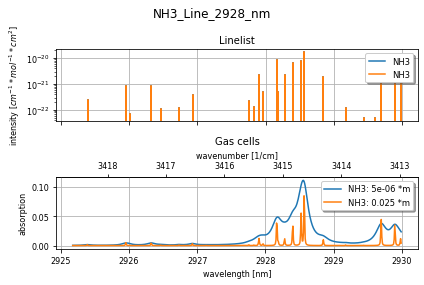

In [40]:
#%% 5. plot
my_spectrum.plot()

In [73]:
#%% 6. export
my_spectrum.export(directory = 'test')